# Determining whether a blood donor is likely to come back for donations the next session.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Blood donations Dataset
test_data= pd.read_csv('BloodDonationPredictions/TestDataBlood.csv')
training_data = pd.read_csv('BloodDonationPredictions/TrainingDataBlood.csv')
table1= pd.DataFrame(test_data)
table2= pd.DataFrame(training_data)

Importing the data in my local dev environment for use. 

In [14]:

table1.head(10)


,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34
5,500,3,21,5250,42
6,530,4,2,500,4
7,244,14,1,250,14
8,249,23,2,500,87
9,728,14,4,1000,64


Displaying table 1 data just to make sure those are the columns I expect.

In [25]:
table2.head(10)

,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


Displaying table2 data just to make sure those are the columns I expect.

In [15]:
print('Test Data columns with null values:\n', table1.isnull().sum())
print("-"*10)
print('Train Data columns with null values:\n', table2.isnull().sum())
print("-"*10)


Test Data columns with null values:
 Donor Id                       0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64
----------
Train Data columns with null values:
 Donor Id                       0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64
----------


In [28]:
table2.describe()

,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [32]:

table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Donor Id                       576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [20]:
# merge the data between the 2 tables
table1['Made Donation in March 2007'] = 'NaN'
data = table2.append(table1)
data.head(10)

# feature engineering



,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [21]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 776 entries, 0 to 199
Data columns (total 6 columns):
Donor Id                       776 non-null int64
Months since Last Donation     776 non-null int64
Number of Donations            776 non-null int64
Total Volume Donated (c.c.)    776 non-null int64
Months since First Donation    776 non-null int64
Made Donation in March 2007    776 non-null object
dtypes: int64(5), object(1)
memory usage: 42.4+ KB


,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [26]:
# calculating months that the user has been donating
data['Months Donating'] = data['Months since First Donation'] - data['Months since Last Donation']
# calculating donations per month for the user
data['Donations per Months Donating'] = data["""Total Volume Donated (c.c.)"""]/data['Months Donating']
data['Donations per Months Donating'] = data['Donations per Months Donating'].replace(np.inf, 999)
# calculating donations per month since the first donation for the user
data['Donations per Months since First Donation'] = data["""Total Volume Donated (c.c.)"""]/data['Months since First Donation']

data['Donation Counts per Months Donating'] = data['Number of Donations']/data['Months Donating']
data['Donation Counts per Months Donating'] = data['Donation Counts per Months Donating'].replace(np.inf, 999)
data['Donation Counts per Months since First Donating'] = data['Number of Donations']/data['Months since First Donation']
data['Donation Counts per Months since First Donating'] = data['Donation Counts per Months since First Donating'].replace(np.inf, 999)
# 
data['Donation Volume per Donation'] = (data["""Total Volume Donated (c.c.)"""]/data['Number of Donations']).replace(np.inf, 999)


In [27]:
test = data[data['Made Donation in March 2007'] == 'NaN']
test.head(5)


,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,Months Donating,Donations per Months Donating,Donations per Months since First Donation,Donation Counts per Months Donating,Donation Counts per Months since First Donating,Donation Volume per Donation
0,659,2,12,3000,52,NaN,50,60.000000,57.692308,0.240000,0.230769,250.0
1,276,21,7,1750,38,NaN,17,102.941176,46.052632,0.411765,0.184211,250.0
2,263,4,1,250,4,NaN,0,999.000000,62.500000,999.000000,0.250000,250.0
3,303,11,11,2750,38,NaN,27,101.851852,72.368421,0.407407,0.289474,250.0
4,83,4,12,3000,34,NaN,30,100.000000,88.235294,0.400000,0.352941,250.0


In [28]:


test.drop(["Made Donation in March 2007"], axis = 1)
train = data[data['Made Donation in March 2007'] != 'NaN']
train.head(5)

,Donor Id,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007,Months Donating,Donations per Months Donating,Donations per Months since First Donation,Donation Counts per Months Donating,Donation Counts per Months since First Donating,Donation Volume per Donation
0,619,2,50,12500,98,1,96,130.208333,127.551020,0.520833,0.510204,250.0
1,664,0,13,3250,28,1,28,116.071429,116.071429,0.464286,0.464286,250.0
2,441,1,16,4000,35,1,34,117.647059,114.285714,0.470588,0.457143,250.0
3,160,2,20,5000,45,1,43,116.279070,111.111111,0.465116,0.444444,250.0
4,358,1,24,6000,77,0,76,78.947368,77.922078,0.315789,0.311688,250.0


In [38]:
train.rename(columns = {'Made Donation in March 2007':'Donated'}, inplace=True)
train.rename(columns = {'Number of Donations':'number_donations'}, inplace=True)
train.rename(columns = {'Total Volume Donated (c.c.)':'total_volume'}, inplace=True)
train.rename(columns = {'Months Donating':'months_donating'}, inplace=True)

train.head(5)


,Donor Id,Months since Last Donation,number_donations,total_volume,Months since First Donation,Donated,months_donating,Donations per Months Donating,Donations per Months since First Donation,Donation Counts per Months Donating,Donation Counts per Months since First Donating,Donation Volume per Donation
0,619,2,50,12500,98,1,96,130.208333,127.551020,0.520833,0.510204,250.0
1,664,0,13,3250,28,1,28,116.071429,116.071429,0.464286,0.464286,250.0
2,441,1,16,4000,35,1,34,117.647059,114.285714,0.470588,0.457143,250.0
3,160,2,20,5000,45,1,43,116.279070,111.111111,0.465116,0.444444,250.0
4,358,1,24,6000,77,0,76,78.947368,77.922078,0.315789,0.311688,250.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


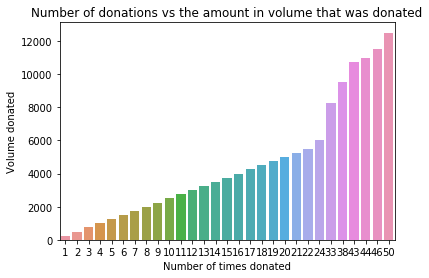

In [35]:

frequency = train.number_donations.values
volume = train.total_volume.values
barplot = sns.barplot(x=frequency, y=volume)
barplot.set(xlabel='Number of Donations', ylabel='Total Volume Donated')
plt.title("Number of donations vs the amount in volume that was donated")
plt.xlabel("Number of times donated")
plt.ylabel("Volume donated")
plt.show()

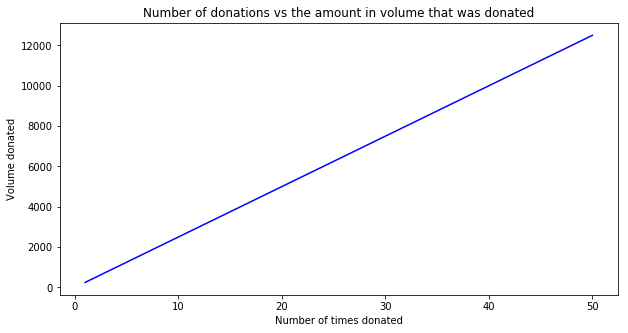

In [36]:
frequency = train.number_donations.values
volume = train.total_volume.values
plt.figure(figsize=(10,5))
plt.plot(frequency, volume, color='blue')
plt.title("Number of donations vs the amount in volume that was donated")
plt.xlabel("Number of times donated")
plt.ylabel("Volume donated")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

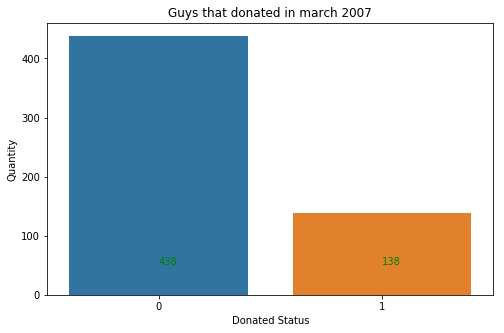

In [37]:
Donated=train.Donated.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=Donated.index, y=Donated.values)

for index, values in enumerate(Donated.values):
    plt.text(index, 50, values, color='green')
    
plt.title("People that donated in march 2007")
plt.xlabel("Donated Status")
plt.ylabel("Quantity")

plt.show()

No handles with labels found to put in legend.


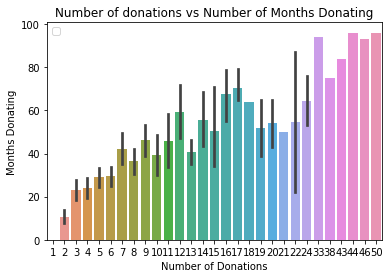

In [40]:
frequency = train.number_donations.values
months = train.months_donating.values
barplot = sns.barplot(x=frequency, y=months)
barplot.set(xlabel='Number of Donations', ylabel='Months Donating')
plt.title("Number of donations vs Number of Months Donating")
plt.xlabel("Number of Donations")
plt.ylabel("Months Donating")
plt.legend()
plt.show()

KeyError: 'person'

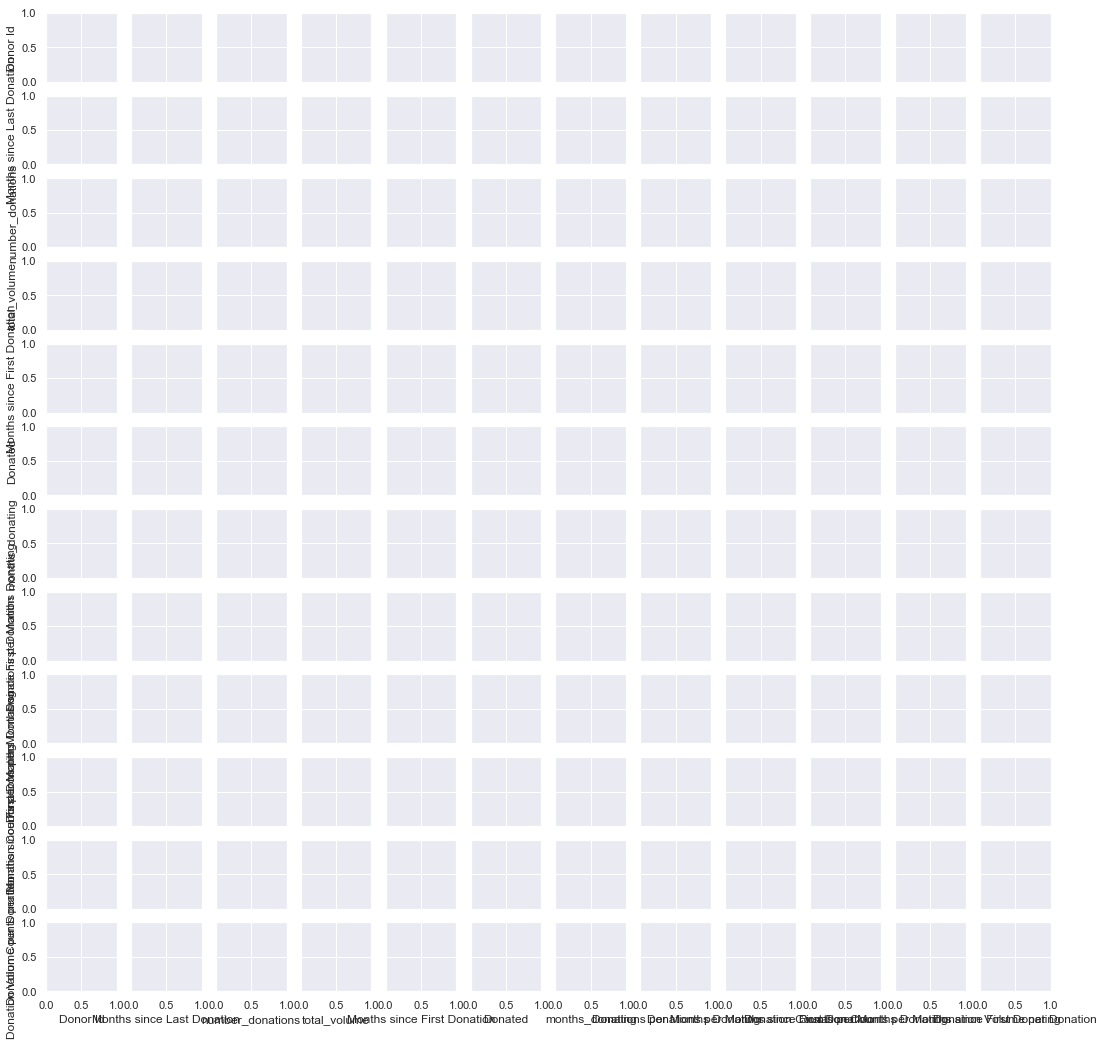

In [45]:
import seaborn as sns;
sns.set()
sns.pairplot(train, hue='person', height=1.5);